In [8]:
from astroquery.gaia import Gaia

In [9]:
# Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"

In [37]:
query_galaxy = "SELECT TOP 1000 dr3.source_id, dr3.random_index, dr3.ra, dr3.dec, dr3.parallax, dr3.pm, dr3.phot_g_mean_mag, dr3.bp_g, dr3.g_rp,\
                p.classprob_dsc_allosmod_quasar AS quasar, p.classprob_dsc_allosmod_galaxy AS galaxy,\
                p.classprob_dsc_allosmod_star AS star\
        FROM gaiadr3.gaia_source as dr3\
        LEFT JOIN gaiadr3.astrophysical_parameters AS p USING (source_id)\
        WHERE dr3.parallax is not null\
        AND dr3.pm is not null\
        AND p.classprob_dsc_allosmod_galaxy > 0.999\
        AND dr3.phot_g_mean_mag > 14.5\
        ORDER BY dr3.random_index"

# query = "SELECT dr3.source_id, p.classlabel_espels\
#         FROM gaiadr3.gaia_source AS dr3\
#         LEFT JOIN gaiadr3.astrophysical_parameters AS p USING (source_id)\
#         WHERE p.classlabel_espels IS NOT NULL\
#         AND random_index between 0 and 100000000"


job = Gaia.launch_job_async(query)

gtable = job.get_results()
gtable

INFO: Query finished. [astroquery.utils.tap.core]


SOURCE_ID,random_index,ra,dec,parallax,pm,phot_g_mean_mag,bp_g,g_rp,quasar,galaxy,star
,,deg,deg,mas,mas / yr,mag,mag,mag,,,
int64,int64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32
1265515347877933440,10075,222.2748877964174,22.198160757624645,-0.33668980134029775,0.7173173,17.933859,-2.318183,3.621396,2.2420623e-11,1.0,1.0961916e-10
5361196917262946432,15072,162.2255880878679,-49.75239367222261,-0.03670704081825209,5.728018,19.842285,-2.7583504,4.355935,9.393035e-12,0.9991883,0.0008117138
1232222032709253760,21887,214.14998079670747,16.513552038185832,1.771743674736804,2.9129527,20.476004,-1.0306759,2.3467827,2.140544e-05,0.9999388,3.978026e-05
2036211254522971136,31435,288.127523847601,26.28806110552507,-0.2814277361136858,5.7879395,20.34236,--,--,3.905006e-32,0.99990237,9.763462e-05
1508859364417098624,48386,210.6647188658992,46.20634448793206,-0.2998018859774316,0.6104444,18.904287,-1.698452,2.9888058,6.760223e-08,0.9999999,2.4985818e-08
1253126291374182656,54587,215.17304544205666,23.28879425028681,2.060774528752372,1.5780792,20.62693,-0.9972191,2.4398327,0.00013327254,0.9997067,0.0001600439
...,...,...,...,...,...,...,...,...,...,...,...
4141678302601679744,9212272,260.4219029044651,-12.648981701285797,-0.22512781411880234,5.5833592,20.370205,--,--,4.0550392e-17,0.99968445,0.00031557598


In [34]:
data = gtable

In [35]:
data = data.to_pandas()

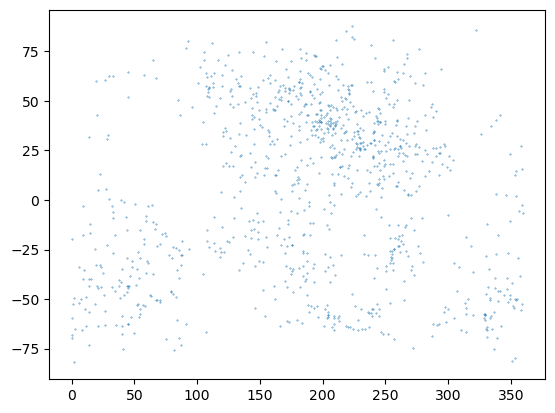

In [36]:
import matplotlib.pyplot as plt

plt.scatter(data['ra'], data['dec'], s = 0.1)

In [25]:
data['classification'] = data[['quasar', 'galaxy', 'star']].idxmax(axis=1, skipna = True)

In [19]:
data

,SOURCE_ID,random_index,ra,dec,parallax,pm,phot_g_mean_mag,bp_g,g_rp,quasar,galaxy,star,classification
0,4267180339403392768,0,286.716913,0.276195,1.084924,4.807036,15.244129,0.697942,0.824186,3.234427e-23,3.325311e-14,1.000000,star
1,5252403815119316480,1,152.625068,-64.267699,0.854356,5.126574,20.906347,0.171606,0.530489,3.233169e-06,1.492212e-08,0.999997,star
2,1937745177867542656,2,348.434982,43.940704,1.042008,3.773118,20.531225,0.540527,1.108757,8.933041e-08,2.235166e-09,1.000000,star
3,5971301282285218048,3,252.729717,-37.917215,0.587660,5.458426,20.145899,1.036097,0.970676,3.213972e-10,8.863590e-11,1.000000,star
4,5953201637243132416,4,260.678787,-44.788772,-0.293376,3.440261,19.787357,0.317444,1.255966,2.265154e-08,4.441385e-08,1.000000,star
...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,5067024230512819968,996,37.102334,-30.570566,2.468058,25.715361,19.305634,1.535702,1.233746,2.280320e-10,2.258232e-10,1.000000,star
760,3245304123813269888,997,59.567373,-5.510030,-0.521269,4.068581,19.644978,0.816336,0.714542,5.417943e-09,1.119331e-08,1.000000,star
761,4145070880118830848,998,269.647893,-16.630968,0.723663,7.532008,19.788506,1.248718,1.220791,1.048605e-08,1.712328e-10,1.000000,star
762,1828668775378435584,999,304.750562,20.888681,0.089603,5.676732,18.830008,0.533484,0.659103,5.731686e-10,1.659242e-09,1.000000,star


In [26]:
data['classification'].value_counts()

classification
star      73985
quasar       91
galaxy       52
Name: count, dtype: int64